В начале как всегда настроим окружение: импортируем все необходимые библиотеки и немного настроим дефолтное отображение картинок.

In [3]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


После этого загрузим в DataFrame данные, с которыми будем работать. Для примеров я выбрала данные о продажах и оценках видео-игр из Kaggle Datasets.

In [4]:
df = pd.read_csv('Games.csv')
# df.info()

In [5]:
df.head(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E


Некоторые признаки, которые pandas считал как object, явно приведем к типам float или int.

In [8]:
df = df.dropna()
print(df.shape)

(6825, 16)


In [9]:
df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')
# df.info()
# df[df['User_Score'] > 8]['Name'].count()

Данные есть не для всех игр, поэтому давайте оставим только те записи, в которых нет пропусков, с помощью метода dropna.

In [27]:
df = df.dropna()
print(df.shape)

(6825, 16)


Всего в таблице 6825 объектов и 16 признаков для них. Посмотрим на несколько первых записей c помощью метода head, чтобы убедиться, что все распарсилось правильно. Для удобства я оставила только те признаки, которые мы будем в дальнейшем использовать.

In [29]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head(20)

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,28.32,87.0,80,8.4,594,E
11,Mario Kart DS,DS,2005,Racing,23.21,91.0,64,8.6,464,E
13,Wii Fit,Wii,2007,Sports,22.70,80.0,63,7.7,146,E
14,Kinect Adventures!,X360,2010,Misc,21.81,61.0,45,6.3,106,E
15,Wii Fit Plus,Wii,2009,Sports,21.79,80.0,33,7.4,52,E


Прежде чем мы перейдем к рассмотрению методов библиотек seaborn и plotly, обсудим самый простой и зачастую удобный способ визуализировать данные из pandas DataFrame — это воспользоваться функцией plot.
Для примера построим график продаж видео игр в различных странах в зависимости от года. Для начала отфильтруем только нужные нам столбцы, затем посчитаем суммарные продажи по годам и у получившегося DataFrame вызовем функцию plot без параметров.

Реализация функции plot в pandas основана на библиотеке matplotlib.

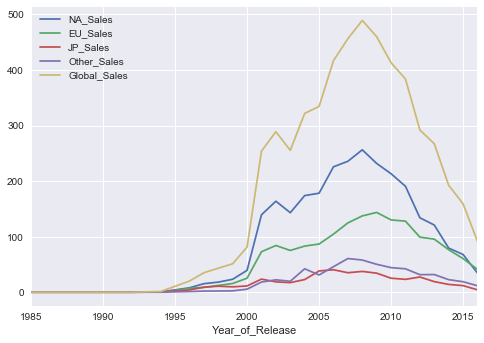

In [11]:
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
sales_df.groupby('Year_of_Release').sum().plot()

C помощью параметра kind можно изменить тип графика, например, на bar chart. Matplotlib позволяет очень гибко настраивать графики. На графике можно изменить почти все, что угодно, но потребуется порыться в документации и найти нужные параметры. Например, параметр rot отвечает за угол наклона подписей к оси x.

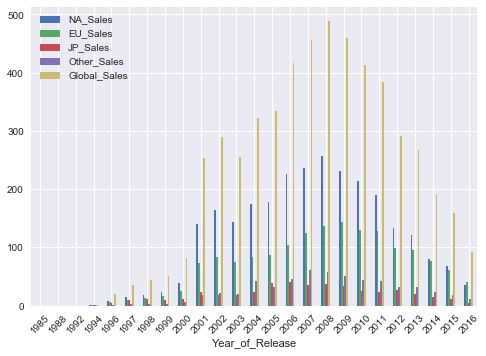

In [21]:
sales_df.groupby('Year_of_Release').sum().plot(kind='bar', rot=45)

## Seaborn

Теперь давайте перейдем к библиотеке seaborn. Seaborn — это по сути более высокоуровневое API на базе библиотеки matplotlib. Seaborn содержит более адекватные дефолтные настройки оформления графиков. Если просто добавить в код import seaborn, то картинки станут гораздо симпатичнее. Также в библиотеке есть достаточно сложные типы визуализации, которые в matplotlib потребовали бы большого количество кода.

Познакомимся с первым таким "сложным" типом графиков pair plot (scatter plot matrix). Эта визуализация поможет нам посмотреть на одной картинке, как связаны между собой различные признаки.

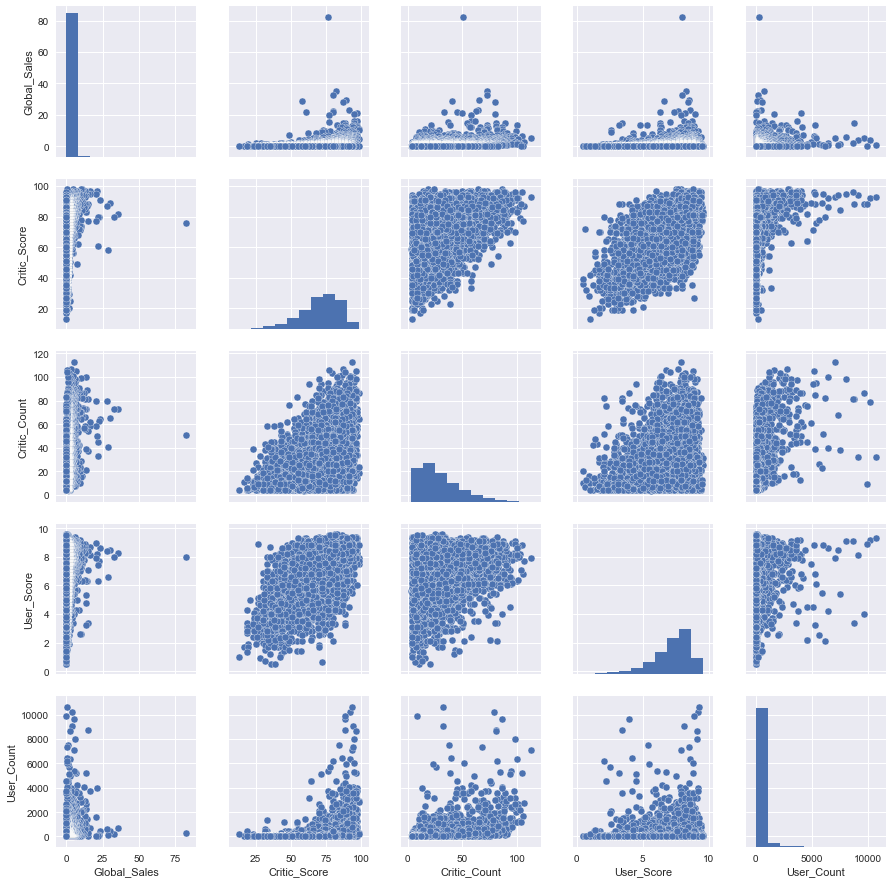

In [22]:
cols = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot.png')

С помощью seaborn можно построить и распределение dist plot. Для примера посмотрим на распределение оценок критиков Critic_Score. По умолчанию на графике отображается гистограмма и kernel density estimation.

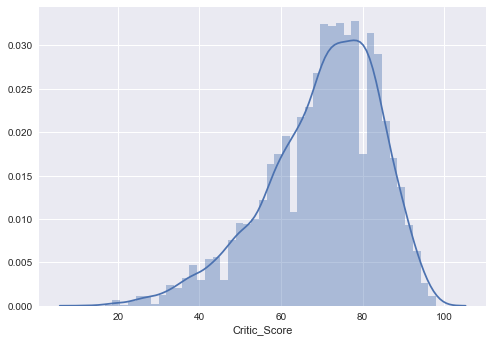

In [30]:
sns.distplot(df.Critic_Score)

Для того, чтобы подробнее посмотреть на взаимосвязь двух численных признаков, есть еще и joint plot — это гибрид scatter plot и histogram. Посмотрим на то, как связаны между собой оценка критиков Critic_Score и оценка пользователя User_Score.

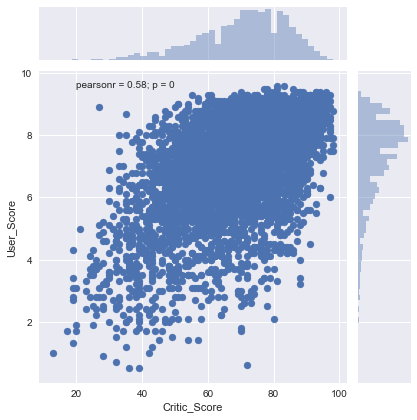

In [31]:
sns.jointplot(df.Critic_Score, df.User_Score)

Еще один полезный тип графиков — это box plot. Давайте сравним оценки игр от критиков для топ-5 крупнейших игровых платформ.

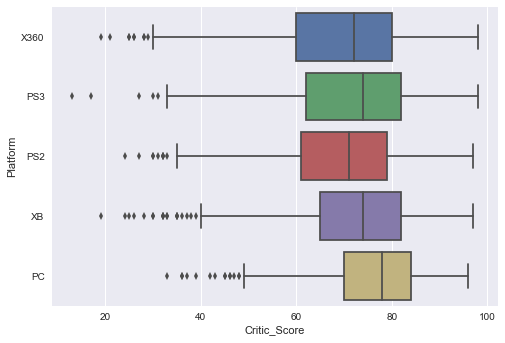

In [32]:
top_platforms = df.Platform.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="Platform", x="Critic_Score", data=df[df.Platform.isin(top_platforms)], orient="h")

Думаю, стоит обсудить немного подробнее, как же понимать box plot. Box plot состоит из коробки (поэтому он и называется box plot), усиков и точек. Коробка показывает интерквартильный размах распределения, то есть соответственно 25% (Q1) и 75% (Q3) перцентили. Черта внутри коробки обозначает медиану распределения.

С коробкой разобрались, перейдем к усам. Усы отображают весь разброс точек кроме выбросов, то есть минимальные и максимальные значения, которые попадают в промежуток (Q1 - 1.5*IQR, Q3 + 1.5*IQR), где IQR = Q3 - Q1 — интерквартильный размах. Точками на графике обозначаются выбросы (outliers) — те значения, которые не вписываются в промежуток значений, заданный усами графика.

Для понимания лучше один раз увидеть, поэтому вот еще и картинка с Wikipedia: https://habrastorage.org/files/d0f/f53/8d5/d0ff538d59154901b18a98469de07fde.png

И еще один тип графиков (последний из тех, которые мы рассмотрим в этой статье) — это heat map. Heat map позволяет посмотреть на распределение какого-то численного признака по двум категориальным. Визуализируем суммарные продажи игр по жанрам и игровым платформам.

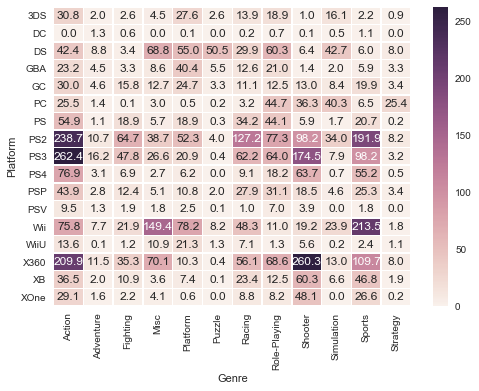

In [33]:
platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)

## Plotly

Мы рассмотрели визуализации на базе библиотеки matplotlib. Однако это не единственная опция для построения графиков на языке python. Познакомимся также с библиотекой plotly. Plotly — это open-source библиотека, которая позволяет строить интерактивные графики в jupyter.notebook'e без необходимости зарываться в javascript код.

Прелесть интерактивных графиков заключается в том, что можно посмотреть точное численное значение при наведении мыши, скрыть неинтересные ряды в визуализации, приблизить определенный участок графика и т.д.

Перед началом работы импортируем все необходимые модули и инициализируем plotly с помощью команды init_notebook_mode.

In [36]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

Для начала построим line plot с динамикой числа вышедших игр и их продаж по годам.

In [37]:
# посчитаем число вышедших игр и проданных копий по годам
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')[['Name']].count()
)
years_df.columns = ['Global_Sales', 'Number_of_Games']

# создаем линию для числа проданных копий
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df.Global_Sales,
    name='Global Sales'
)

# создаем линию для числа вышедших игр 
trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.Number_of_Games,
    name='Number of games released'
)

# определяем массив данных и задаем title графика в layout
data = [trace0, trace1]
layout = {'title': 'Statistics of video games'}

# cоздаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

В plotly строится визуализация объекта Figure, который состоит из данных (массив линий, которые в библиотеке называются traces) и оформления/стиля, за который отвечает объект layout. В простых случаях можно вызывать функцию iplot и просто от массива traces.

Параметр show_link отвечает за ссылки на online-платформу plot.ly на графиках. Поскольку обычно это функциональность не нужна, то я предпочитаю скрывать ее для предотвращения случайных нажатий.

Можно сразу сохранить график в виде html-файла.

In [39]:
plotly.offline.plot(fig, filename='years_stats.html', show_link=False)

'file://C:\\Users\\KAV\\OpenDataScience\\years_stats.html'

Посмотрим также на рыночную долю игровых платформ, рассчитанную по количеству выпущенных игр и по суммарной выручке. Для этого построим bar chart.

In [40]:
# считаем число проданных и вышедших игр по платформам
platforms_df = df.groupby('Platform')[['Global_Sales']].sum().join(
    df.groupby('Platform')[['Name']].count()
)
platforms_df.columns = ['Global_Sales', 'Number_of_Games']
platforms_df.sort_values('Global_Sales', ascending=False, inplace=True)

# создаем traces для визуализации
trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Global_Sales,
    name='Global Sales'
)

trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Number_of_Games,
    name='Number of games released'
)

# создаем массив с данными и задаем title для графика и оси x в layout
data = [trace0, trace1]
layout = {'title': 'Share of platforms', 'xaxis': {'title': 'platform'}}

# создаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

В plotly можно построить и box plot. Рассмотрим распределения оценок критиков в зависимости от жанра игры.

In [41]:
# создаем Box trace для каждого жанра из наших данных
data = []
for genre in df.Genre.unique():
    data.append(
        go.Box(y=df[df.Genre==genre].Critic_Score, name=genre)
    )

# визуализируем данные
iplot(data, show_link = False)

С помощью plotly можно построить и другие типы визуализаций. Графики получаются достаточно симпатичными с дефолтными настройками. Однако библиотека позволяет и гибко настраивать различные параметры визуализации: цвета, шрифты, подписи, аннотации и многое другое.

## Пример визуального анализа данных

Считываем в DataFrame знакомые нам по первой статье данные по оттоку клиентов телеком-оператора.

In [57]:
df = pd.read_csv('telecom.csv')

Проверим, все ли нормально считалось – посмотрим на первые 5 строк (метод head).

In [43]:
df.shape

(3333, 21)

Посмотрим на признаки и убедимся, что пропусков ни в одном из них нет – везде по 3333 записи.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

Посмотрим на распределение целевого класса – оттока клиентов.

In [46]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

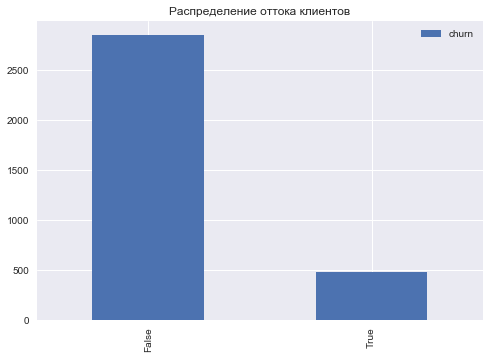

In [47]:
df['churn'].value_counts().plot(kind='bar', label='churn')
plt.legend()
plt.title('Распределение оттока клиентов');

Выделим следующие группы признаков (среди всех кроме Churn ):

- бинарные: International plan, Voice mail plan
- категориальные: State
- порядковые: Customer service calls
- количественные: все остальные

Посмотрим на корреляции количественных признаков. По раскрашенной матрице корреляций видно, что такие признаки как Total day charge считаются по проговоренным минутам (Total day minutes). То есть 4 признака можно выкинуть, они не несут полезной информации.

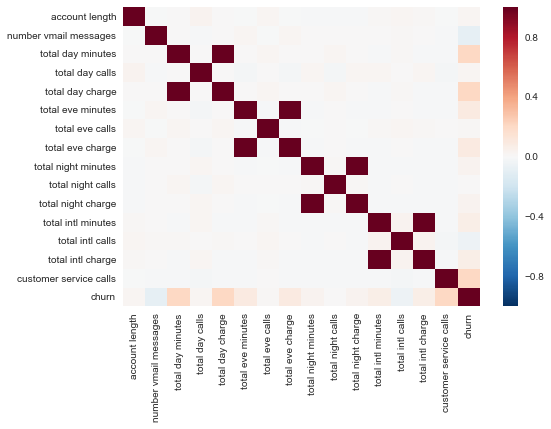

In [53]:
corr_matrix = df.drop(['state', 'international plan', 'voice mail plan', 'area code'], axis=1).corr()
sns.heatmap(corr_matrix);

Теперь посмотрим на распределения всех интересующих нас количественных признаков. На бинарные/категориальные/порядковые признакие будем смотреть отдельно.

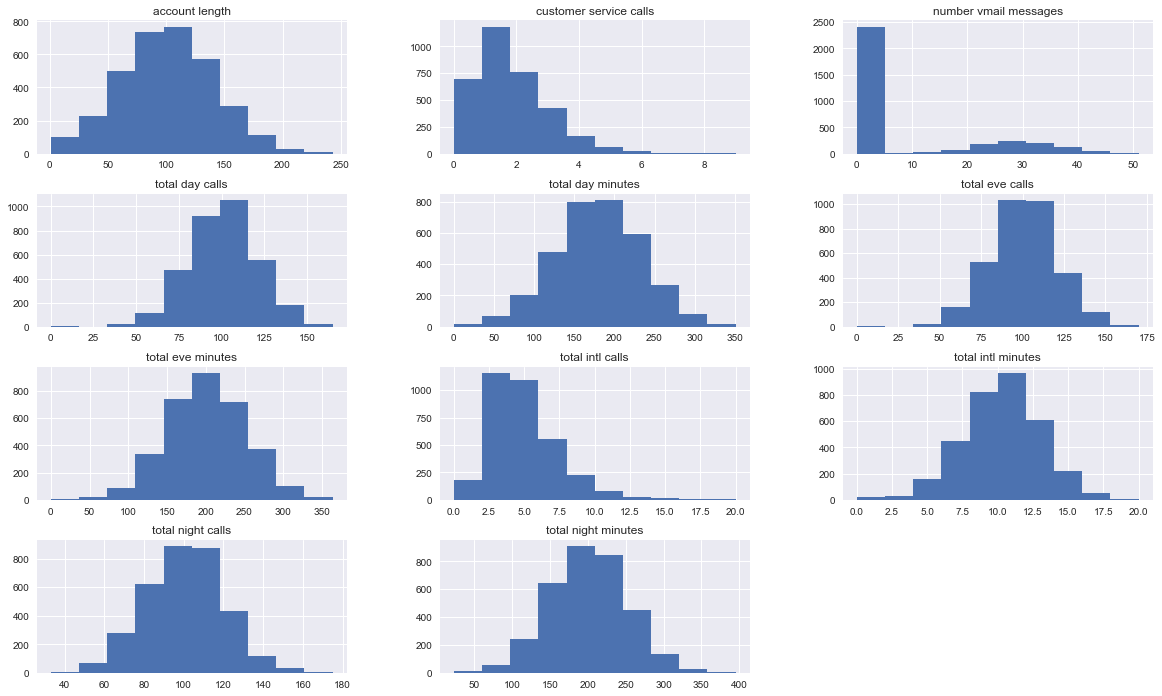

In [71]:
features = list(set(df.columns) - set(['state', 'international plan', 'voice mail plan',  'area code',
                                      'total day charge',   'total eve charge',   'total night charge',
                                        'total intl charge', 'churn']))

df[features].hist(figsize=(20,12));

Видим, что большинство признаков распределены нормально. Исключения – число звонков в сервисный центр (Customer service calls) (тут больше подходит пуассоновское распределение) и число голосовых сообщений (Number vmail messages, пик в нуле, т.е. это те, у кого голосовая почта не подключена). Также смещено распределение числа международных звонков (Total intl calls).

Еще полезно строить вот такие картинки, где на главной диагонали рисуются распределения признаков, а вне главной диагонали – диаграммы рассеяния для пар признаков. Бывает, что это приводит к каким-то выводам, но в данном случае все примерно понятно, без сюрпризов.

In [76]:
# df = df.dropna()
print(df.shape)

(3333, 21)


Wall time: 18.1 s


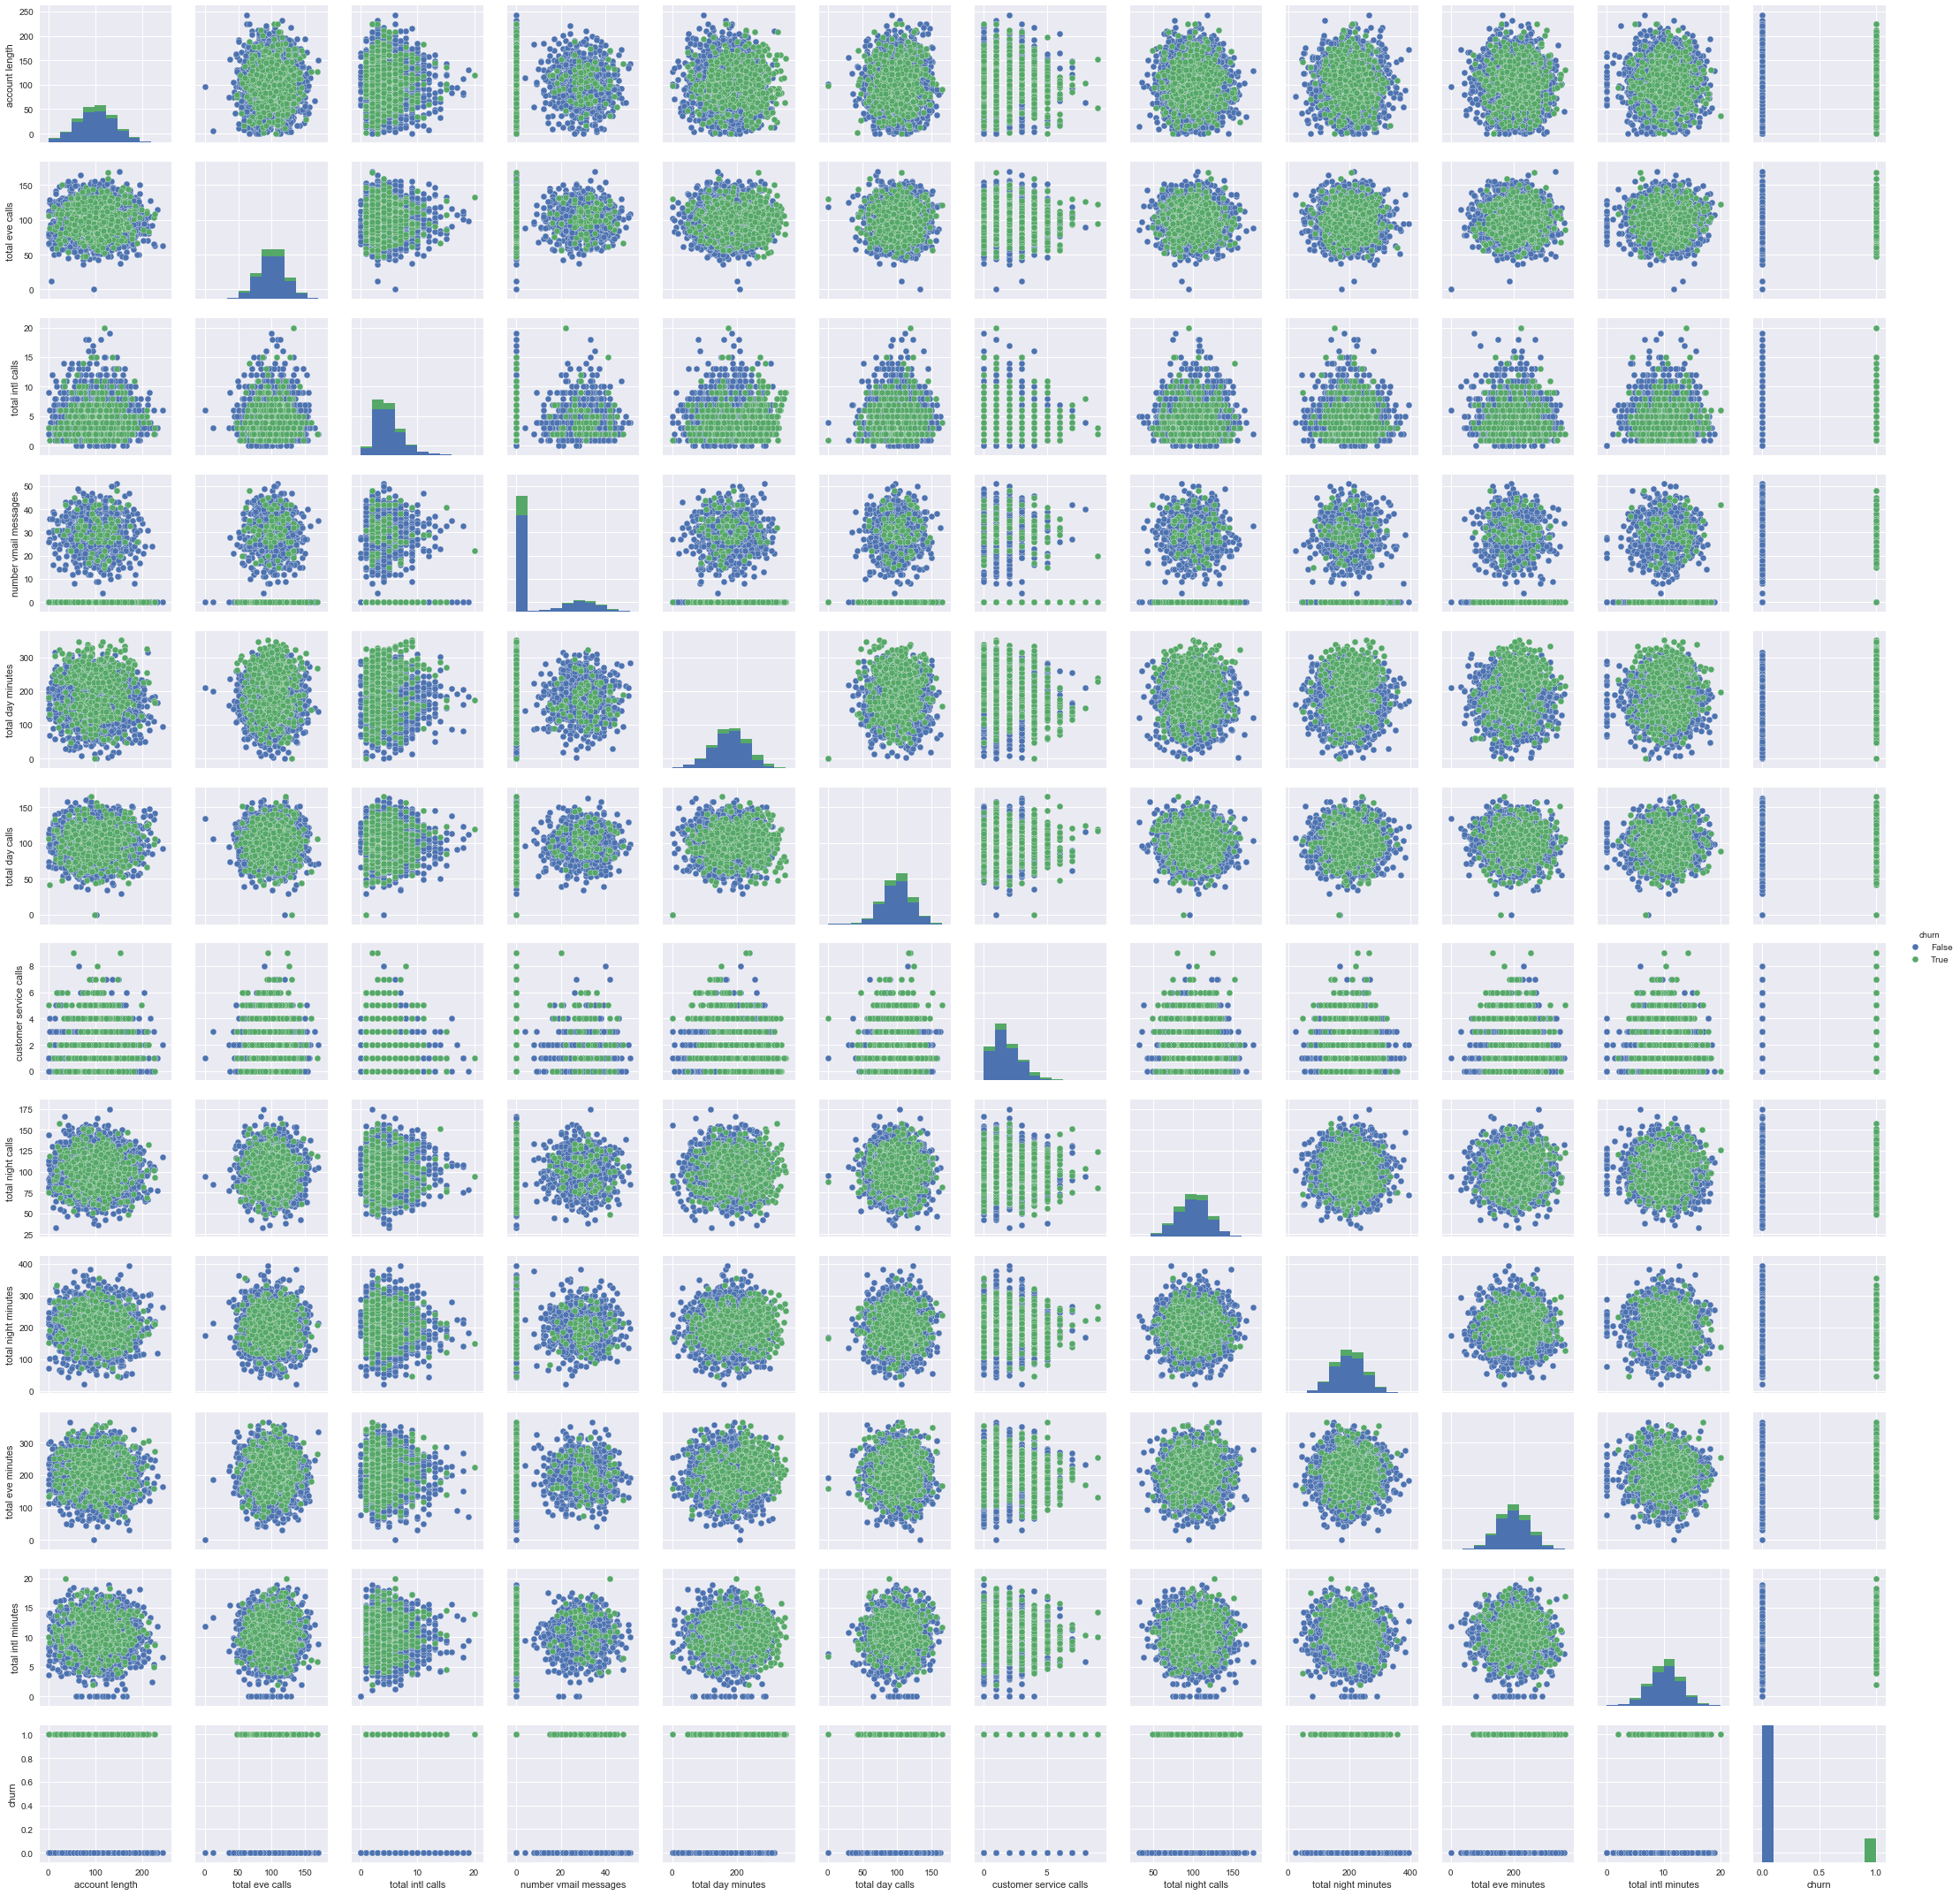

In [131]:
# %%time
sns.pairplot(df[features + ['churn']], hue='churn');

#### Дальше посмотрим, как признаки связаны с целевым – с оттоком.

Построим boxplot-ы, описывающее статистики распределения количественных признаков в двух группах: среди лояльных и ушедших клиентов.

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

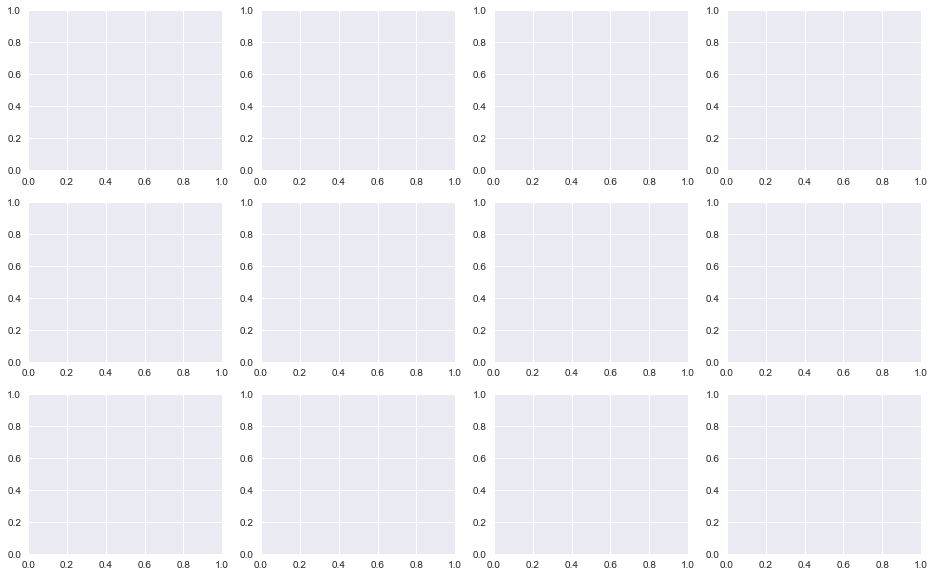

In [92]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

for idx, feat in  enumerate(features):
    sns.boxplot(x='churn', y=feat, data=df, ax=axes[idx / 4, idx % 4])
    axes[idx / 4, idx % 4].legend()
    axes[idx / 4, idx % 4].set_xlabel('churn')
    axes[idx / 4, idx % 4].set_ylabel(feat);

На глаз наибольшее отличие мы видим для признаков Total day minutes, Customer service calls и Number vmail messages. Впоследствии мы научимся определять важность признаков в задаче классификации с помощью случайного леса (или градиентного бустинга), и окажется, что первые два – действительно очень важные признаки для прогнозирования оттока.

Посмотрим отдельно на картинки с распределением кол-ва проговоренных днем минут среди лояльных/ушедших. Слева — знакомые нам боксплоты, справа – сглаженные гистограммы распределения числового признака в двух группах (скорее просто красивая картинка, все и так понятно по боксплоту).

Интересное наблюдение: в среднем ушедшие клиенты больше пользуются связью. Возможно, они недовольны тарифами, и одной из мер борьбы с оттоком будет понижение тарифных ставок (стоимости мобильной связи). Но это уже компании надо будет проводить дополнительный экономический анализ, действительно ли такие меры будут оправданы.

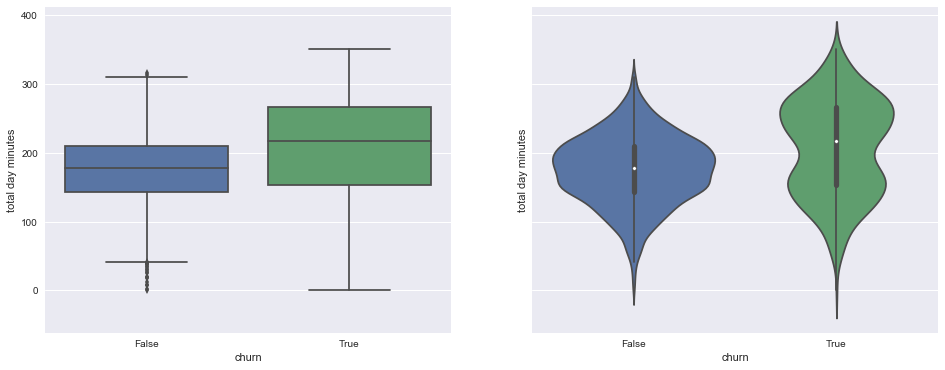

In [90]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

sns.boxplot(x='churn', y='total day minutes', data=df, ax=axes[0]);
sns.violinplot(x='churn', y='total day minutes', data=df, ax=axes[1]);

Теперь изобразим распределение числа обращений в сервисный центр (такую картинку мы строили в первой статье). Тут уникальных значений признака не много (признак можно считать как количественным целочисленным, так и порядковым), и наглядней изобразить распределение с помощью countplot. Наблюдение: доля оттока сильно возрастает начиная с 4 звонков в сервисный центр.

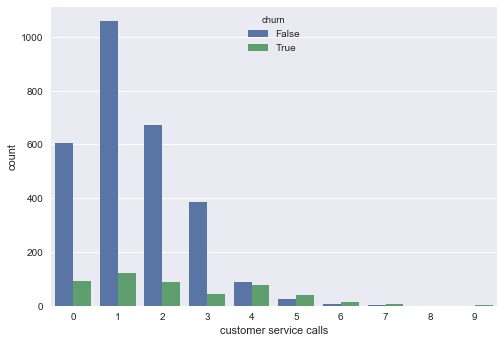

In [87]:
sns.countplot(x='customer service calls', hue='churn', data=df);

Теперь посмотрим на связь бинарных признаков International plan и Voice mail plan с оттоком. Наблюдение: когда роуминг подключен, доля оттока намного выше, т.е. наличие международного роуминга – сильный признак. Про голосовую почту такого нельзя сказать.

Wall time: 1.21 s


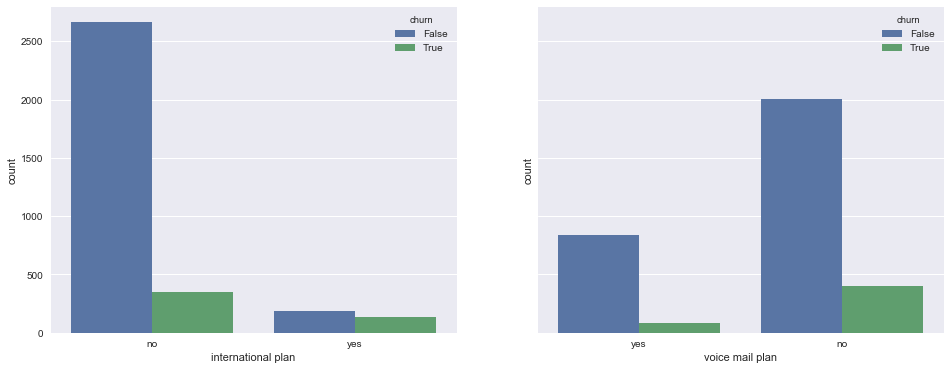

In [130]:
# %%time
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

sns.countplot(x='international plan', hue='churn', data=df, ax=axes[0]);
sns.countplot(x='voice mail plan', hue='churn', data=df, ax=axes[1]);

Наконец, посмотрим, как с оттоком связан категориальный признак State. С ним уже не так приятно работать, поскольку число уникальных штатов довольно велико – 51. Можно в начале построить сводную табличку или посчитать процент оттока для каждого штата. Но данных по каждом штату по отдельности маловато (ушедших клиентов всего от 3 до 17 в каждом штате), поэтому, возможно, признак State впоследствии не стоит добавлять в модели классификации из-за риска переобучения (но мы это будем проверять на кросс-валидации, stay tuned!).

Доли оттока для каждого штата:

In [94]:
df.groupby(['state'])['hurn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

state,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,...,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,...,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


Видно, что в Нью-Джерси и Калифорнии доля оттока выше 25%, а на Гавайях и в Аляске меньше 5%. Но эти выводы построены на слишком скромной статистике и возможно, это просто особенности имеющихся данных (тут можно и гипотезы попроверять про корреляции Мэтьюса и Крамера, но это уже за рамками данной статьи).

### Подглядывание в n-мерное пространство с t-SNE

Построим t-SNE представление все тех же данных по оттоку. Название метода сложное – t-distributed Stohastic Neighbor Embedding, математика тоже крутая (и вникать в нее не будем, но для желающих – вот оригинальная статья Д. Хинтона и его аспиранта в JMLR), но основная идея проста, как дверь: найдем такое отображение из многомерного признакового пространства на плоскость (или в 3D, но почти всегда выбирают 2D), чтоб точки, которые были далеко друг от друга, на плоскости тоже оказались удаленными, а близкие точки – также отобразились на близкие. То есть neighbor embedding – это своего рода поиск нового представления данных, при котором сохраняется соседство.

Немного деталей: выкинем штаты и признак оттока, бинарные Yes/No-признаки переведем в числа (pd.factorize). Также нужно масштабировать выборку – из каждого признака вычесть его среднее и поделить на стандартное отклонение, это делает StandardScaler.

In [161]:
%%time
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('telecom.csv')
df[df['phone number'] == '400-4344'].head()

Wall time: 29 ms


In [158]:
# df.head(1)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False


In [154]:
# X = df.drop(['churn', 'state', 'voice mail plan', 'international plan'], axis=1)
# X.head(1)

In [163]:
# преобразуем все признаки в числовые, выкинув штаты
# X = df.drop(['churn', 'state', 'voice mail plan', 'international plan'], axis=1)
X = df.drop(['churn', 'state', 'phone number'], axis=1)
# X.head()
X['international plan'] = pd.factorize(X['international plan'])[0]
X['voice mail plan'] = pd.factorize(X['voice mail plan'])[0]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [164]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

Wall time: 26.6 s


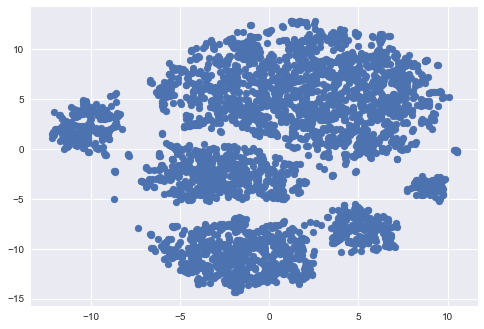

In [165]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);